<a href="https://colab.research.google.com/github/trista-paul/DS-Unit-1-Sprint-3-Data-Storytelling/blob/master/module3-make-explanatory-visualizations/LS_DS_223_Make_explanatory_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Make explanatory visualizations




Tody we will reproduce this [example by FiveThirtyEight:](https://fivethirtyeight.com/features/al-gores-new-movie-exposes-the-big-flaw-in-online-movie-ratings/)

In [13]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

Using this data: https://github.com/fivethirtyeight/data/tree/master/inconvenient-sequel

Objectives
- add emphasis and annotations to transform visualizations from exploratory to explanatory
- remove clutter from visualizations

Links
- [Strong Titles Are The Biggest Bang for Your Buck](http://stephanieevergreen.com/strong-titles/)
- [Remove to improve (the data-ink ratio)](https://www.darkhorseanalytics.com/blog/data-looks-better-naked)
- [How to Generate FiveThirtyEight Graphs in Python](https://www.dataquest.io/blog/making-538-plots/)

## Make prototypes

This  helps us understand the problem

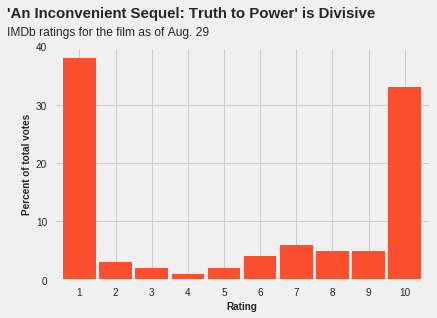

In [39]:
#mock dataset by value counts
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


plt.style.use('fivethirtyeight')

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))

fakeplot = fake.plot.bar(color='C1', width=0.9);
#without these all bars are different color and far apart
#C1 second color in palette
fakeplot.tick_params(labelrotation=0)
fakeplot.text(x=-2, y=45, s="'An Inconvenient Sequel: Truth to Power' is Divisive", fontsize=15, fontweight='bold')
#units are same coordinates as data; not mathematical
fakeplot.text(x=-2, y=42, s='IMDb ratings for the film as of Aug. 29', fontsize=12);
fakeplot.set(yticks=range(0,50,10)); #lower bound, upper, increment
plt.xlabel('Rating', fontsize=10, fontweight='bold');
plt.ylabel('Percent of total votes', fontsize=10, fontweight='bold');

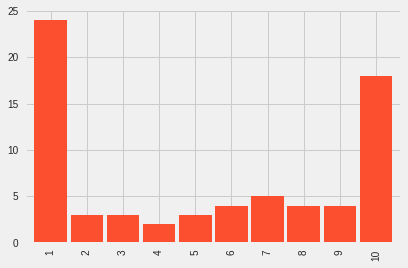

In [15]:
#alternate mock data set - by individual point
fake2 = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

fake2.value_counts().sort_index().plot.bar(color='C1', width=0.9);

## Annotate with text

## Reproduce with real data

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')

In [42]:
df.shape #oh no

(80053, 27)

In [45]:
df.sample(1).T

,1654
timestamp,2017-07-21 04:00:05.354348
respondents,2
category,IMDb staff
link,http://www.imdb.com/title/tt6322922/ratings-im...
average,8
mean,8
median,8
1_votes,0
2_votes,0
3_votes,0


In [44]:
pd.options.display.max_columns = 500
df.head()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
1,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
3,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
4,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [48]:
#are there multiple movies in the set?
#timestamp?
#what is causing the difference between average and mean?
#make sure it only has data between Jul17 and Aug29
df.timestamp.describe()
df.timestamp = pd.to_datetime(df.timestamp)
df.timestamp.describe()
#first, last check out

count                          80053
unique                         80053
top       2017-07-24 23:00:02.760781
freq                               1
first     2017-07-17 12:28:32.785639
last      2017-08-29 23:10:06.218251
Name: timestamp, dtype: object

In [49]:
#slice by timestamp (day)
df = df.set_index('timestamp')
df['2017-08-29']
#each link is the same movie, so this is good


,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 00:00:02.248882,1682,Males,http://www.imdb.com/title/tt6322922/ratings-male,5.3,5.3,6,671,50,29,12,42,79,107,90,83,519,39.9,3.0,1.7,0.7,2.5,4.7,6.4,5.4,4.9,30.9
2017-08-29 00:00:02.499363,257,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.3,10,53,3,4,4,4,5,14,13,26,131,20.6,1.2,1.6,1.6,1.6,1.9,5.4,5.1,10.1,51.0
2017-08-29 00:00:02.727204,15,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.5,5.3,5,7,0,0,0,1,0,1,0,0,6,46.7,0.0,0.0,0.0,6.7,0.0,6.7,0.0,0.0,40.0
2017-08-29 00:00:03.024270,13,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,5.3,5.9,7,5,0,0,0,1,0,1,0,0,6,38.5,0.0,0.0,0.0,7.7,0.0,7.7,0.0,0.0,46.2
2017-08-29 00:00:03.248207,2,Females under 18,http://www.imdb.com/title/tt6322922/ratings-fe...,1.0,1.0,1,2,0,0,0,0,0,0,0,0,0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-29 00:00:03.441529,450,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.4,6.6,8,117,3,6,7,17,24,35,28,23,190,26.0,0.7,1.3,1.6,3.8,5.3,7.8,6.2,5.1,42.2
2017-08-29 00:00:03.636825,402,Males Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-ma...,6.3,6.5,8,112,3,4,6,15,20,33,25,21,163,27.9,0.7,1.0,1.5,3.7,5.0,8.2,6.2,5.2,40.5
2017-08-29 00:00:03.839446,41,Females Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-fe...,7.1,7.9,10,4,0,2,1,2,2,2,3,2,23,9.8,0.0,4.9,2.4,4.9,4.9,4.9,7.3,4.9,56.1
2017-08-29 00:00:04.030663,771,Aged 30-44,http://www.imdb.com/title/tt6322922/ratings-age_3,5.6,5.6,7,287,21,12,4,21,36,53,38,49,250,37.2,2.7,1.6,0.5,2.7,4.7,6.9,4.9,6.4,32.4


In [50]:
df.category.value_counts()
#sliced by demographic
#we only need 'IMDB users'

Females Aged 18-29    4216
Males Aged 45+        4216
Top 1000 voters       4216
Females Aged 45+      4216
Aged 30-44            4216
Males under 18        4216
Males                 4216
Aged 45+              4216
IMDb users            4216
Males Aged 30-44      4216
Males Aged 18-29      4216
US users              4216
Aged 18-29            4216
Females Aged 30-44    4216
Aged under 18         4216
Females               4216
IMDb staff            4216
Non-US users          4216
Females under 18      4165
Name: category, dtype: int64

In [51]:
condition = [df.category=='IMDb users']

lastday = df['2017-08-29']
lastday = lastday[lastday.category=='IMDb users']
lastday.tail()
#now we have everything - percentage of rating values on the last day for IMDb users

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 22:30:06.423181,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:40:06.233659,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:50:06.592571,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:00:05.829558,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


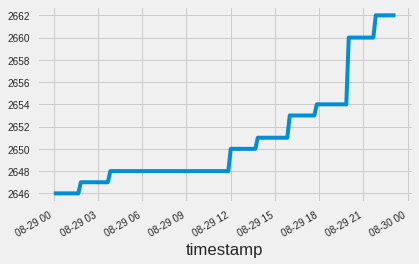

In [52]:
lastday[lastday.category=='IMDb users'].respondents.plot();
#confirms respondents is cumulative

In [53]:
#clean lastday
final = df.tail(1)
columns = [str(i) + '_pct' for i in range(1,11)]
final = final[columns]
final

,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,
2017-08-29 23:10:06.218251,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


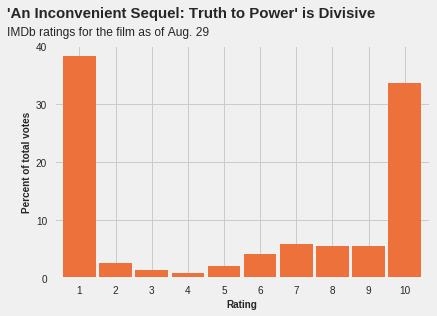

In [61]:
data = final[columns].T
data.index = range(1,11)

plt.style.use('fivethirtyeight')

ax = data.plot.bar(color='#ED713A', width=0.9, legend=False);
ax.tick_params(labelrotation=0)
ax.text(x=-2, y=45, s="'An Inconvenient Sequel: Truth to Power' is Divisive", fontsize=15, fontweight='bold')
ax.text(x=-2, y=42, s='IMDb ratings for the film as of Aug. 29', fontsize=12);
ax.set(yticks=range(0,50,10));
plt.xlabel('Rating', fontsize=10, fontweight='bold');
plt.ylabel('Percent of total votes', fontsize=10, fontweight='bold');

# ASSIGNMENT

Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

# STRETCH OPTIONS

#### Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

For example:
- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) (try the [`altair`](https://altair-viz.github.io/gallery/index.html#maps) library)
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) (try the [`statsmodels`](https://www.statsmodels.org/stable/index.html) library)
- or another example of your choice!

#### Make more charts!

Choose a chart you want to make, from [FT's Visual Vocabulary poster](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!







